### After Cleaning the Dataset, we now do some Exploratory Data Analysis (EDA) 

In [1]:
## Importing the libraries

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import scikitplot as skplt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option ('display.max_columns',500)

In [3]:
# Read the Cleaned DataSet 
clean_df= pd.read_csv(r'clean_df.csv')

In [4]:
clean_df.shape

(16168, 36)

In [5]:
# Explore the variables inside the dataset
clean_df.head(2)

,Customer Number,Campaign Period Sales,Historical Sales Volume,Date of First Purchase,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method_NOTICE,Repurchase Method_PAYMENT PLAN,Last Transaction Channel_BILLING,Last Transaction Channel_BRANCH (PHONE),Last Transaction Channel_BRANCH (POS),Last Transaction Channel_IT,Last Transaction Channel_MAIL,Last Transaction Channel_PHONE,Last Transaction Channel_UNKNOWN,Last Transaction Channel_WEB,Desk_Y,Executive Chair_Y,Standard Chair_Y,Monitor_Y,Printer_Y,Computer_Y,Insurance_Y,Toner_Y,Office Supplies_Y,Number of Employees_Huge,Number of Employees_Large,Number of Employees_medium,Number of Employees_small,Number of Employees_unknown,Language_Non English,Language_Unknown,year_of_first_purchase,Years_since_customer
0,86734.0,238.704762,146803.428571,1968-10-01,15.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1968,52
1,97098.0,281.680000,439984.160000,1981-06-15,22.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1981,39


### EDA

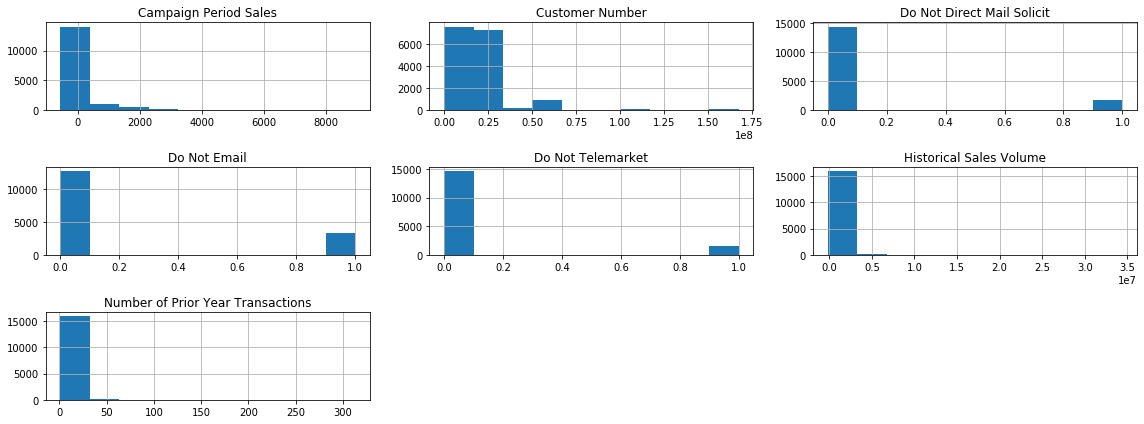

In [13]:
# finding any skewed data by plotting on histograms.Do not Direct Mail, Do not Email and Do not Telemarket are binary distributions while Campaing period Sales , Number of Prior Transaction are skewed
clean_df.select_dtypes('float').hist(figsize= (16,6))
plt.tight_layout()

In [14]:
clean_df[['Campaign Period Sales', 'Historical Sales Volume', 'Number of Prior Year Transactions']].describe()

,Campaign Period Sales,Historical Sales Volume,Number of Prior Year Transactions
count,16168.000000,1.616800e+04,16168.000000
mean,245.751989,6.713433e+05,14.484043
std,720.053152,9.556720e+05,8.030736
min,-566.500000,-1.643031e+05,1.000000
25%,0.000000,1.900188e+05,8.000000
50%,0.000000,3.965039e+05,16.000000
75%,145.538667,7.871561e+05,20.000000
max,8936.850000,3.441213e+07,313.000000


In [15]:
clean_df[['Campaign Period Sales', 'Historical Sales Volume', 'Number of Prior Year Transactions']].apply(np.log)

,Campaign Period Sales,Historical Sales Volume,Number of Prior Year Transactions
0,5.475227,11.896850,2.708050
1,5.640772,12.994494,3.091042
2,6.070408,13.785531,2.944439
3,-inf,12.346676,2.833213
4,7.222688,10.218420,3.044522
...,...,...,...
16163,-inf,13.460684,1.098612
16164,-inf,14.755049,1.945910
16165,-inf,14.672064,1.791759
16166,-inf,13.278632,0.693147


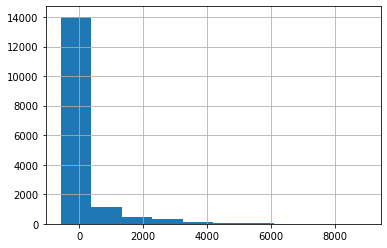

In [16]:
clean_df['Campaign Period Sales'].hist()

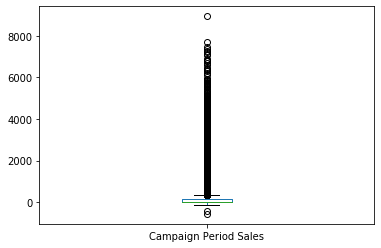

In [18]:
clean_df['Campaign Period Sales'].plot(kind = 'box')

In [19]:
# We see there are negative values in sales and sales volume which is not possible. Replacing negative values with zero
clean_df.loc[clean_df['Campaign Period Sales'] < 0] = 0
clean_df.loc[clean_df['Historical Sales Volume'] < 0] = 0

In [20]:
clean_df[['Campaign Period Sales', 'Historical Sales Volume', 'Number of Prior Year Transactions']].describe()

,Campaign Period Sales,Historical Sales Volume,Number of Prior Year Transactions
count,16168.000000,1.616800e+04,16168.000000
mean,245.840071,6.713209e+05,14.475878
std,719.999064,9.556780e+05,8.036521
min,0.000000,0.000000e+00,0.000000
25%,0.000000,1.900134e+05,8.000000
50%,0.000000,3.962959e+05,16.000000
75%,145.538667,7.871561e+05,20.000000
max,8936.850000,3.441213e+07,313.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B7056E7D08>,
      dtype=object)

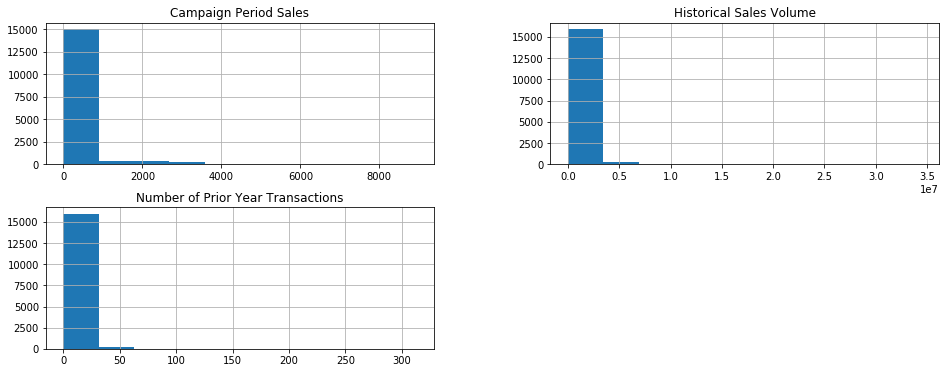

In [21]:
#Finding out skewnwess in these variables by plotting histogram
clean_df[['Campaign Period Sales', 'Historical Sales Volume', 'Number of Prior Year Transactions']].hist(figsize=(16,6))

In [8]:
# Find out customers who have bought no product in past and neither during campaign period, yet show sales in historical period, that is bad data
clean_df.loc[(clean_df['Desk_Y'] == 0) & (clean_df['Executive Chair_Y'] == 0) & 
    (clean_df['Standard Chair_Y'] == 0) & (clean_df['Monitor_Y'] == 0) &
    (clean_df['Printer_Y'] == 0) & (clean_df['Computer_Y'] == 0) & 
    (clean_df['Insurance_Y'] == 0) & (clean_df['Toner_Y'] == 0) &
    (clean_df['Office Supplies_Y'] == 0) & (clean_df['Campaign Period Sales'] == 0) & (clean_df['Historical Sales Volume'] > 0)]


,Customer Number,Campaign Period Sales,Historical Sales Volume,Date of First Purchase,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method_NOTICE,Repurchase Method_PAYMENT PLAN,Last Transaction Channel_BILLING,Last Transaction Channel_BRANCH (PHONE),Last Transaction Channel_BRANCH (POS),Last Transaction Channel_IT,Last Transaction Channel_MAIL,Last Transaction Channel_PHONE,Last Transaction Channel_UNKNOWN,Last Transaction Channel_WEB,Desk_Y,Executive Chair_Y,Standard Chair_Y,Monitor_Y,Printer_Y,Computer_Y,Insurance_Y,Toner_Y,Office Supplies_Y,Number of Employees_Huge,Number of Employees_Large,Number of Employees_medium,Number of Employees_small,Number of Employees_unknown,Language_Non English,Language_Unknown,year_of_first_purchase,Years_since_customer
6,163829.0,0.0,1.512525e+05,1986-11-15,6.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1986,34
29,292424.0,0.0,2.868293e+05,1990-01-15,1.0,1.0,1.0,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1990,30
33,316370.0,0.0,1.120125e+05,1988-09-15,3.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1988,32
39,342310.0,0.0,1.052576e+05,1990-04-15,16.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1990,30
40,355155.0,0.0,2.958857e+06,1990-01-01,11.0,0.0,1.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1990,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16162,166955549.0,0.0,4.959500e+04,2015-06-18,2.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2015,5
16164,167014041.0,0.0,2.558801e+06,1994-06-01,7.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1994,26
16165,167077817.0,0.0,2.355030e+06,1995-01-01,6.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1995,25
16166,167089540.0,0.0,5.845700e+05,1996-02-01,2.0,0.0,1.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1996,24


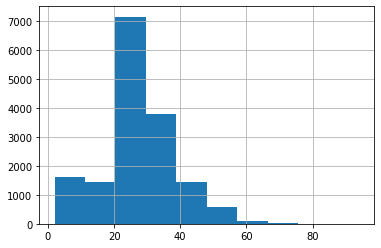

In [11]:
# Find the years loyal range in which most of the customers fall
clean_df['Years_since_customer'].hist()

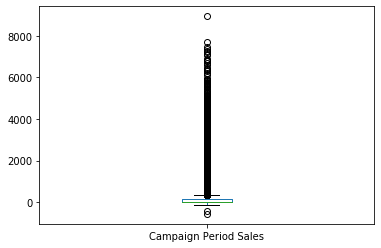

In [9]:
# since clean_df has first dummy variable dropped also read the dataset with all dummies 
clean_df_dummies= pd.read_csv(r'clean_df_dummies.csv')


In [10]:
clean_df_dummies.loc[clean_df['Campaign Period Sales'] < 0] = 0
clean_df_dummies.loc[clean_df['Historical Sales Volume'] < 0] = 0

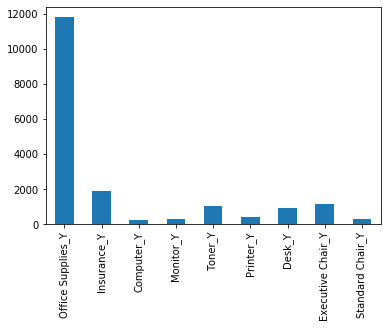

In [53]:
# Create a bar plot of products to understand which ones are bought the most
clean_df[['Office Supplies_Y','Insurance_Y','Computer_Y','Monitor_Y','Toner_Y','Printer_Y', 'Desk_Y', 'Executive Chair_Y','Standard Chair_Y']].sum(axis=0).plot.bar()

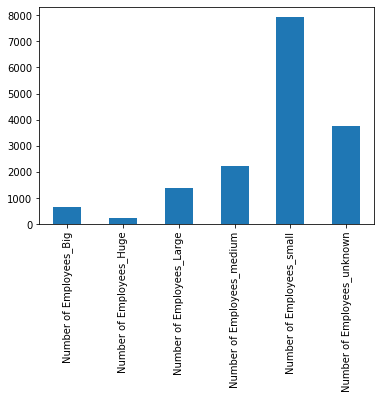

In [57]:
# Create a bar plot to find out the number of employees of the customers
clean_df_dummies[['Number of Employees_Big','Number of Employees_Huge','Number of Employees_Large','Number of Employees_medium','Number of Employees_small','Number of Employees_unknown']].sum(axis=0).plot.bar()

In [ ]:
#Find  out customers who had history of prior purchase of products, how many made a purchase or not during campaign period

In [24]:
# create a dataframe for all customers who made no purchase during  campaign
zero = clean_df_dummies[clean_df_dummies['Campaign Period Sales'] == 0]

In [25]:
# create a dataframe for all customers who made a purchase during campaign
one = clean_df_dummies[clean_df_dummies['Campaign Period Sales'] >0]

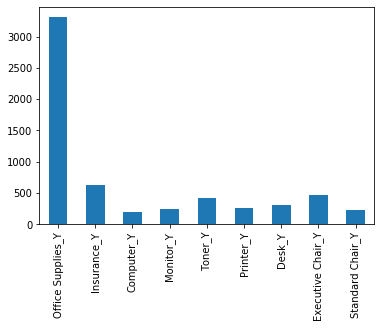

In [54]:
one[['Office Supplies_Y','Insurance_Y','Computer_Y','Monitor_Y','Toner_Y','Printer_Y', 'Desk_Y', 'Executive Chair_Y','Standard Chair_Y']].sum(axis=0).plot.bar()

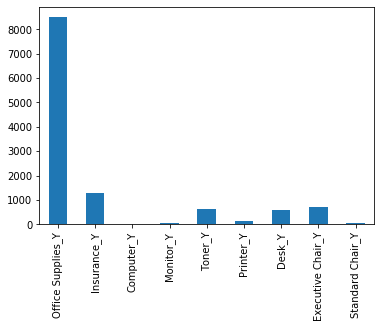

In [55]:
zero[['Office Supplies_Y','Insurance_Y','Computer_Y','Monitor_Y','Toner_Y','Printer_Y', 'Desk_Y', 'Executive Chair_Y','Standard Chair_Y']].sum(axis=0).plot.bar()

In [26]:
# customers who made no purchase in campaign were loyal to store since 14 years on average
zero['Number of Prior Year Transactions'].describe()

count    11791.000000
mean        13.793995
std          7.600001
min          0.000000
25%          7.000000
50%         15.000000
75%         20.000000
max         64.000000
Name: Number of Prior Year Transactions, dtype: float64

In [27]:
# customers who made a purchase in campaign were loyal to store since 16 years on average 
one['Number of Prior Year Transactions'].describe()

count    4377.000000
mean       16.312771
std         8.852266
min         1.000000
25%        11.000000
50%        17.000000
75%        20.000000
max       313.000000
Name: Number of Prior Year Transactions, dtype: float64

In [41]:
# customers who made a purchase in campaign who had bought a computer
one[one['Computer_Y']==1].describe()

,Customer Number,Campaign Period Sales,Historical Sales Volume,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method_AUTO RENEW,Repurchase Method_NOTICE,Repurchase Method_PAYMENT PLAN,Last Transaction Channel_AUTO RENEW,Last Transaction Channel_BILLING,Last Transaction Channel_BRANCH (PHONE),Last Transaction Channel_BRANCH (POS),Last Transaction Channel_IT,Last Transaction Channel_MAIL,Last Transaction Channel_PHONE,Last Transaction Channel_UNKNOWN,Last Transaction Channel_WEB,Desk_N,Desk_Y,Executive Chair_N,Executive Chair_Y,Standard Chair_N,Standard Chair_Y,Monitor_N,Monitor_Y,Printer_N,Printer_Y,Computer_N,Computer_Y,Insurance_N,Insurance_Y,Toner_N,Toner_Y,Office Supplies_N,Office Supplies_Y,Number of Employees_Big,Number of Employees_Huge,Number of Employees_Large,Number of Employees_medium,Number of Employees_small,Number of Employees_unknown,Language_English,Language_Non English,Language_Unknown,year_of_first_purchase,Years_since_customer
count,1.950000e+02,195.000000,1.950000e+02,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.0,195.000000,195.000000,195.000000,195.000000,195.0,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.0,195.0,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,2.831826e+07,2942.826558,1.811759e+06,18.307692,0.143590,0.210256,0.128205,0.794872,0.205128,0.0,0.543590,0.010256,0.015385,0.015385,0.0,0.087179,0.061538,0.025641,0.241026,0.517949,0.482051,0.364103,0.635897,0.287179,0.712821,0.092308,0.907692,0.158974,0.841026,0.0,1.0,0.215385,0.784615,0.271795,0.728205,0.235897,0.764103,0.107692,0.041026,0.020513,0.005128,0.066667,0.758974,0.205128,0.005128,0.789744,1991.184615,28.815385
std,3.248730e+07,1636.234636,2.068827e+06,12.329150,0.351576,0.408540,0.335179,0.404835,0.404835,0.0,0.499378,0.101013,0.123394,0.123394,0.0,0.282824,0.240934,0.158469,0.428807,0.500964,0.500964,0.482416,0.482416,0.453611,0.453611,0.290205,0.290205,0.366593,0.366593,0.0,0.0,0.412147,0.412147,0.446030,0.446030,0.425651,0.425651,0.310789,0.198860,0.142111,0.071611,0.250086,0.428807,0.404835,0.071611,0.408540,13.133995,13.133995
min,3.903020e+05,42.986667,4.929600e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1949.000000,3.000000
25%,9.318018e+06,1826.643333,5.047813e+05,8.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1980.500000,26.000000
50%,2.055696e+07,2615.000000,1.200053e+06,17.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.0,1.0,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1993.000000,27.000000
75%,3.192112e+07,4114.331000,2.346642e+06,25.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.0,1.0,0.000000,1.000000,1.000000,1.000000,0.

In [42]:
# customers who do not make purchase in campaign who had bought a computer before
zero[zero['Computer_Y']==1].describe()

,Customer Number,Campaign Period Sales,Historical Sales Volume,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method_AUTO RENEW,Repurchase Method_NOTICE,Repurchase Method_PAYMENT PLAN,Last Transaction Channel_AUTO RENEW,Last Transaction Channel_BILLING,Last Transaction Channel_BRANCH (PHONE),Last Transaction Channel_BRANCH (POS),Last Transaction Channel_IT,Last Transaction Channel_MAIL,Last Transaction Channel_PHONE,Last Transaction Channel_UNKNOWN,Last Transaction Channel_WEB,Desk_N,Desk_Y,Executive Chair_N,Executive Chair_Y,Standard Chair_N,Standard Chair_Y,Monitor_N,Monitor_Y,Printer_N,Printer_Y,Computer_N,Computer_Y,Insurance_N,Insurance_Y,Toner_N,Toner_Y,Office Supplies_N,Office Supplies_Y,Number of Employees_Big,Number of Employees_Huge,Number of Employees_Large,Number of Employees_medium,Number of Employees_small,Number of Employees_unknown,Language_English,Language_Non English,Language_Unknown,year_of_first_purchase,Years_since_customer
count,3.500000e+01,35.0,3.500000e+01,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.0,35.000000,35.0,35.000000,35.000000,35.0,35.000000,35.0,35.0,35.000000,35.000000,35.000000,35.00000,35.00000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.0,35.0,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.0,35.000000,35.000000,35.000000
mean,2.777927e+07,0.0,2.735853e+06,16.514286,0.142857,0.285714,0.142857,0.371429,0.628571,0.0,0.257143,0.0,0.028571,0.028571,0.0,0.428571,0.0,0.0,0.257143,0.771429,0.228571,0.40000,0.60000,0.771429,0.228571,0.571429,0.428571,0.685714,0.314286,0.0,1.0,0.714286,0.285714,0.657143,0.342857,0.314286,0.685714,0.142857,0.114286,0.028571,0.142857,0.142857,0.428571,0.571429,0.0,0.428571,1994.600000,25.400000
std,2.428346e+07,0.0,2.709626e+06,9.059838,0.355036,0.458349,0.355036,0.490241,0.490241,0.0,0.443440,0.0,0.169031,0.169031,0.0,0.502096,0.0,0.0,0.443440,0.426043,0.426043,0.49705,0.49705,0.426043,0.426043,0.502096,0.502096,0.471008,0.471008,0.0,0.0,0.458349,0.458349,0.481594,0.481594,0.471008,0.471008,0.355036,0.322803,0.169031,0.355036,0.355036,0.502096,0.502096,0.0,0.502096,10.789974,10.789974
min,8.333380e+05,0.0,1.634901e+04,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1973.000000,5.000000
25%,1.484744e+07,0.0,1.300844e+06,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1985.500000,17.000000
50%,2.231874e+07,0.0,1.877183e+06,19.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,1.000000,0.000000,0.00000,1.00000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,1995.000000,25.000000
75%,2.911134e+07,0.0,3.583454e+06,22.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.0,0.500000,0.0,0.000000,0.000000,0.0,1.000000,0.0,0.0,0.500000,1.000000,0.000000,1.00000,1.00000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.0,1.000000,2003.000000,34.500000
max,1.086995e+08,0.0,1.450430e+07,45.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,0.0,1.000

In [30]:
# 85% people who had purchased computer made purchase during campaign period 
195/(195+35)

0.8478260869565217

In [43]:
# customers who made a purchase in campaign who had bought a standard chair before
one[one['Standard Chair_Y']==1].describe()

,Customer Number,Campaign Period Sales,Historical Sales Volume,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method_AUTO RENEW,Repurchase Method_NOTICE,Repurchase Method_PAYMENT PLAN,Last Transaction Channel_AUTO RENEW,Last Transaction Channel_BILLING,Last Transaction Channel_BRANCH (PHONE),Last Transaction Channel_BRANCH (POS),Last Transaction Channel_IT,Last Transaction Channel_MAIL,Last Transaction Channel_PHONE,Last Transaction Channel_UNKNOWN,Last Transaction Channel_WEB,Desk_N,Desk_Y,Executive Chair_N,Executive Chair_Y,Standard Chair_N,Standard Chair_Y,Monitor_N,Monitor_Y,Printer_N,Printer_Y,Computer_N,Computer_Y,Insurance_N,Insurance_Y,Toner_N,Toner_Y,Office Supplies_N,Office Supplies_Y,Number of Employees_Big,Number of Employees_Huge,Number of Employees_Large,Number of Employees_medium,Number of Employees_small,Number of Employees_unknown,Language_English,Language_Non English,Language_Unknown,year_of_first_purchase,Years_since_customer
count,2.230000e+02,223.000000,2.230000e+02,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.0,223.000000,223.000000,223.000000,223.000000,223.0,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.0,223.0,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,2.622146e+07,2692.231571,1.680409e+06,18.677130,0.139013,0.246637,0.121076,0.672646,0.327354,0.0,0.457399,0.004484,0.031390,0.017937,0.0,0.134529,0.094170,0.040359,0.219731,0.475336,0.524664,0.381166,0.618834,0.0,1.0,0.210762,0.789238,0.300448,0.699552,0.376682,0.623318,0.372197,0.627803,0.417040,0.582960,0.269058,0.730942,0.094170,0.035874,0.049327,0.017937,0.134529,0.668161,0.304933,0.008969,0.686099,1989.973094,30.026906
std,2.674362e+07,1761.720768,2.034018e+06,11.655095,0.346739,0.432023,0.326950,0.470303,0.470303,0.0,0.499303,0.066965,0.174762,0.133022,0.0,0.341988,0.292723,0.197242,0.414996,0.500515,0.500515,0.486766,0.486766,0.0,0.0,0.408767,0.408767,0.459484,0.459484,0.485644,0.485644,0.484478,0.484478,0.494179,0.494179,0.444468,0.444468,0.292723,0.186395,0.217038,0.133022,0.341988,0.471933,0.461415,0.094489,0.465121,13.083901,13.083901
min,3.903020e+05,42.986667,7.684693e+03,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1956.000000,3.000000
25%,1.059101e+07,1325.410000,3.848264e+05,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1980.000000,26.000000
50%,2.102344e+07,2590.533333,1.121865e+06,18.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,1.0,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1993.000000,27.000000
75%,3.186360e+07,3950.808333,2.310355e+06,25.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.

In [44]:
# customers who do not make purchase in campaign who had bought a computer before
zero[zero['Standard Chair_Y']==1].describe()

,Customer Number,Campaign Period Sales,Historical Sales Volume,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method_AUTO RENEW,Repurchase Method_NOTICE,Repurchase Method_PAYMENT PLAN,Last Transaction Channel_AUTO RENEW,Last Transaction Channel_BILLING,Last Transaction Channel_BRANCH (PHONE),Last Transaction Channel_BRANCH (POS),Last Transaction Channel_IT,Last Transaction Channel_MAIL,Last Transaction Channel_PHONE,Last Transaction Channel_UNKNOWN,Last Transaction Channel_WEB,Desk_N,Desk_Y,Executive Chair_N,Executive Chair_Y,Standard Chair_N,Standard Chair_Y,Monitor_N,Monitor_Y,Printer_N,Printer_Y,Computer_N,Computer_Y,Insurance_N,Insurance_Y,Toner_N,Toner_Y,Office Supplies_N,Office Supplies_Y,Number of Employees_Big,Number of Employees_Huge,Number of Employees_Large,Number of Employees_medium,Number of Employees_small,Number of Employees_unknown,Language_English,Language_Non English,Language_Unknown,year_of_first_purchase,Years_since_customer
count,5.800000e+01,58.0,5.800000e+01,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.0,58.000000,58.000000,58.000000,58.000000,58.0,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.0,58.0,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.0,58.000000,58.000000,58.000000
mean,2.279025e+07,0.0,1.877677e+06,14.396552,0.172414,0.224138,0.172414,0.362069,0.637931,0.0,0.258621,0.017241,0.034483,0.017241,0.0,0.396552,0.068966,0.017241,0.189655,0.793103,0.206897,0.689655,0.310345,0.0,1.0,0.810345,0.189655,0.844828,0.155172,0.862069,0.137931,0.775862,0.224138,0.862069,0.137931,0.413793,0.586207,0.068966,0.034483,0.068966,0.086207,0.327586,0.413793,0.534483,0.0,0.465517,1990.344828,29.655172
std,2.686112e+07,0.0,2.396745e+06,7.905005,0.381039,0.420655,0.381039,0.484796,0.484796,0.0,0.441701,0.131306,0.184059,0.131306,0.0,0.493454,0.255609,0.131306,0.395452,0.408619,0.408619,0.466675,0.466675,0.0,0.0,0.395452,0.395452,0.365231,0.365231,0.347839,0.347839,0.420655,0.420655,0.347839,0.347839,0.496814,0.496814,0.255609,0.184059,0.255609,0.283121,0.473432,0.496814,0.503166,0.0,0.503166,10.472272,10.472272
min,8.925900e+05,0.0,1.433250e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1964.000000,3.000000
25%,6.726266e+06,0.0,3.576549e+05,7.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.0,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1984.250000,25.000000
50%,1.633449e+07,0.0,1.265501e+06,16.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,1.0,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,1987.000000,33.000000
75%,2.919997e+07,0.0,2.475797e+06,20.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.0,0.750000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.0,1.0,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.0,1.000000,1995.000000,35.750000
max,1.640239e+

In [31]:
# 80% people who had purchased standard chair made purchase during campaign period 
223/(223+58)

0.7935943060498221

In [32]:
# customers who make purchase in campaign who had bought office supplies before
one[one['Office Supplies_Y']==1].describe()

,Customer Number,Campaign Period Sales,Historical Sales Volume,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method_AUTO RENEW,Repurchase Method_NOTICE,Repurchase Method_PAYMENT PLAN,Last Transaction Channel_AUTO RENEW,Last Transaction Channel_BILLING,Last Transaction Channel_BRANCH (PHONE),Last Transaction Channel_BRANCH (POS),Last Transaction Channel_IT,Last Transaction Channel_MAIL,Last Transaction Channel_PHONE,Last Transaction Channel_UNKNOWN,Last Transaction Channel_WEB,Desk_N,Desk_Y,Executive Chair_N,Executive Chair_Y,Standard Chair_N,Standard Chair_Y,Monitor_N,Monitor_Y,Printer_N,Printer_Y,Computer_N,Computer_Y,Insurance_N,Insurance_Y,Toner_N,Toner_Y,Office Supplies_N,Office Supplies_Y,Number of Employees_Big,Number of Employees_Huge,Number of Employees_Large,Number of Employees_medium,Number of Employees_small,Number of Employees_unknown,Language_English,Language_Non English,Language_Unknown,year_of_first_purchase,Years_since_customer
count,3.306000e+03,3306.000000,3.306000e+03,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.0,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.0,3306.0,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000
mean,1.731900e+07,531.179866,5.788931e+05,16.866001,0.090744,0.200242,0.081972,0.278887,0.721113,0.0,0.208409,0.001512,0.026013,0.039020,0.000907,0.493043,0.055959,0.020871,0.154265,0.928615,0.071385,0.888990,0.111010,0.950696,0.049304,0.943134,0.056866,0.936177,0.063823,0.954930,0.045070,0.863884,0.136116,0.897157,0.102843,0.0,1.0,0.049002,0.015124,0.092257,0.158197,0.631579,0.053842,0.880218,0.024198,0.095584,1987.403509,32.596491
std,1.211967e+07,791.589645,8.628798e+05,6.166859,0.287288,0.400242,0.274364,0.448520,0.448520,0.0,0.406232,0.038866,0.159199,0.193672,0.030115,0.500027,0.229877,0.142975,0.361257,0.257506,0.257506,0.314192,0.314192,0.216535,0.216535,0.231622,0.231622,0.244475,0.244475,0.207488,0.207488,0.342964,0.342964,0.303800,0.303800,0.0,0.0,0.215904,0.122065,0.289431,0.364981,0.482449,0.225739,0.324756,0.153688,0.294064,13.441595,13.441595
min,8.673400e+04,6.571429,1.319314e+03,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1946.000000,2.000000
25%,8.412325e+06,202.240476,1.697712e+05,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1977.000000,26.000000
50%,1.683563e+07,302.184667,3.483419e+05,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1992.000000,28.000000
75%,2.526975e+07,487.076667,6.822591e+05,20.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.00000

In [33]:
# customers who do not make purchase in campaign who had bought office supplies before
zero[zero['Office Supplies_Y']==1].describe()

,Customer Number,Campaign Period Sales,Historical Sales Volume,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method_AUTO RENEW,Repurchase Method_NOTICE,Repurchase Method_PAYMENT PLAN,Last Transaction Channel_AUTO RENEW,Last Transaction Channel_BILLING,Last Transaction Channel_BRANCH (PHONE),Last Transaction Channel_BRANCH (POS),Last Transaction Channel_IT,Last Transaction Channel_MAIL,Last Transaction Channel_PHONE,Last Transaction Channel_UNKNOWN,Last Transaction Channel_WEB,Desk_N,Desk_Y,Executive Chair_N,Executive Chair_Y,Standard Chair_N,Standard Chair_Y,Monitor_N,Monitor_Y,Printer_N,Printer_Y,Computer_N,Computer_Y,Insurance_N,Insurance_Y,Toner_N,Toner_Y,Office Supplies_N,Office Supplies_Y,Number of Employees_Big,Number of Employees_Huge,Number of Employees_Large,Number of Employees_medium,Number of Employees_small,Number of Employees_unknown,Language_English,Language_Non English,Language_Unknown,year_of_first_purchase,Years_since_customer
count,8.490000e+03,8490.0,8.490000e+03,8490.000000,8490.000000,8490.000000,8490.000000,8490.000000,8490.000000,8490.0,8490.000000,8490.000000,8490.000000,8490.000000,8490.000000,8490.000000,8490.000000,8490.000000,8490.000000,8490.000000,8490.000000,8490.000000,8490.000000,8490.000000,8490.000000,8490.000000,8490.000000,8490.000000,8490.000000,8490.000000,8490.000000,8490.000000,8490.000000,8490.000000,8490.000000,8490.0,8490.0,8490.000000,8490.000000,8490.000000,8490.000000,8490.000000,8490.000000,8490.000000,8490.000000,8490.000000,8490.000000,8490.000000
mean,1.695501e+07,0.0,5.962106e+05,16.755948,0.086455,0.195053,0.078092,0.246525,0.753475,0.0,0.185512,0.000824,0.023204,0.039105,0.000707,0.504711,0.063251,0.025677,0.157008,0.948292,0.051708,0.934158,0.065842,0.995995,0.004005,0.995642,0.004358,0.986455,0.013545,0.997173,0.002827,0.894700,0.105300,0.944759,0.055241,0.0,1.0,0.049117,0.017550,0.109187,0.177974,0.634040,0.012132,0.916961,0.031449,0.051590,1994.360071,25.639929
std,9.613754e+06,0.0,7.789484e+05,5.766108,0.281051,0.396265,0.268332,0.431013,0.431013,0.0,0.388736,0.028704,0.150559,0.193856,0.026576,0.500007,0.243428,0.158180,0.363830,0.221450,0.221450,0.248021,0.248021,0.063160,0.063160,0.065876,0.065876,0.115600,0.115600,0.053096,0.053096,0.306958,0.306958,0.228464,0.228464,0.0,0.0,0.216124,0.131317,0.311892,0.382513,0.481727,0.109481,0.275957,0.174537,0.221211,8.988142,8.988142
min,1.163900e+05,0.0,1.881905e+03,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1950.000000,2.000000
25%,8.516854e+06,0.0,1.930456e+05,14.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1989.000000,23.000000
50%,1.679802e+07,0.0,3.900817e+05,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1995.000000,25.000000
75%,2.512715e+07,0.0,7.202080e+05,20.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,

In [34]:
# 30% people who had purchased Office Supplies made purchase during campaign period 
3306/(3306+8490)

0.280264496439471

In [47]:
# customers who make purchase in campaign and who had bought a monitor before
one[one['Monitor_Y']==1].describe()

,Customer Number,Campaign Period Sales,Historical Sales Volume,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method_AUTO RENEW,Repurchase Method_NOTICE,Repurchase Method_PAYMENT PLAN,Last Transaction Channel_AUTO RENEW,Last Transaction Channel_BILLING,Last Transaction Channel_BRANCH (PHONE),Last Transaction Channel_BRANCH (POS),Last Transaction Channel_IT,Last Transaction Channel_MAIL,Last Transaction Channel_PHONE,Last Transaction Channel_UNKNOWN,Last Transaction Channel_WEB,Desk_N,Desk_Y,Executive Chair_N,Executive Chair_Y,Standard Chair_N,Standard Chair_Y,Monitor_N,Monitor_Y,Printer_N,Printer_Y,Computer_N,Computer_Y,Insurance_N,Insurance_Y,Toner_N,Toner_Y,Office Supplies_N,Office Supplies_Y,Number of Employees_Big,Number of Employees_Huge,Number of Employees_Large,Number of Employees_medium,Number of Employees_small,Number of Employees_unknown,Language_English,Language_Non English,Language_Unknown,year_of_first_purchase,Years_since_customer
count,2.460000e+02,246.000000,2.460000e+02,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.0,246.000000,246.000000,246.000000,246.000000,246.0,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.0,246.0,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000
mean,2.688276e+07,2786.037661,1.712037e+06,18.943089,0.154472,0.235772,0.138211,0.743902,0.256098,0.0,0.504065,0.004065,0.016260,0.024390,0.0,0.093496,0.073171,0.024390,0.260163,0.560976,0.439024,0.418699,0.581301,0.284553,0.715447,0.0,1.0,0.235772,0.764228,0.280488,0.719512,0.341463,0.658537,0.373984,0.626016,0.235772,0.764228,0.113821,0.048780,0.040650,0.016260,0.093496,0.686992,0.276423,0.012195,0.711382,1991.426829,28.573171
std,2.915802e+07,1679.550088,1.957486e+06,12.080884,0.362137,0.425346,0.345825,0.437366,0.437366,0.0,0.501003,0.063758,0.126732,0.154572,0.0,0.291720,0.260947,0.154572,0.439618,0.497280,0.497280,0.494352,0.494352,0.452121,0.452121,0.0,0.0,0.425346,0.425346,0.450153,0.450153,0.475167,0.475167,0.484846,0.484846,0.425346,0.425346,0.318241,0.215848,0.197882,0.126732,0.291720,0.464663,0.448140,0.109980,0.454044,13.007719,13.007719
min,3.903020e+05,42.986667,4.929600e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1954.000000,3.000000
25%,9.656727e+06,1487.800000,4.966052e+05,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1981.000000,25.250000
50%,2.095079e+07,2591.266667,1.175573e+06,19.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,1.0,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1993.000000,27.000000
75%,3.146317e+07,3910.291667,2.242531e+06,25.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.

In [48]:
# customers who do not make purchase in campaign and who had bought a monitor before
zero[zero['Monitor_Y']==1].describe()

,Customer Number,Campaign Period Sales,Historical Sales Volume,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method_AUTO RENEW,Repurchase Method_NOTICE,Repurchase Method_PAYMENT PLAN,Last Transaction Channel_AUTO RENEW,Last Transaction Channel_BILLING,Last Transaction Channel_BRANCH (PHONE),Last Transaction Channel_BRANCH (POS),Last Transaction Channel_IT,Last Transaction Channel_MAIL,Last Transaction Channel_PHONE,Last Transaction Channel_UNKNOWN,Last Transaction Channel_WEB,Desk_N,Desk_Y,Executive Chair_N,Executive Chair_Y,Standard Chair_N,Standard Chair_Y,Monitor_N,Monitor_Y,Printer_N,Printer_Y,Computer_N,Computer_Y,Insurance_N,Insurance_Y,Toner_N,Toner_Y,Office Supplies_N,Office Supplies_Y,Number of Employees_Big,Number of Employees_Huge,Number of Employees_Large,Number of Employees_medium,Number of Employees_small,Number of Employees_unknown,Language_English,Language_Non English,Language_Unknown,year_of_first_purchase,Years_since_customer
count,5.200000e+01,52.0,5.200000e+01,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.0,52.000000,52.0,52.000000,52.0,52.0,52.000000,52.000000,52.0,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.0,52.0,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.0,52.000000,52.000000,52.000000
mean,2.154955e+07,0.0,2.357131e+06,16.461538,0.057692,0.173077,0.057692,0.365385,0.634615,0.0,0.250000,0.0,0.019231,0.0,0.0,0.480769,0.019231,0.0,0.230769,0.750000,0.250000,0.634615,0.365385,0.788462,0.211538,0.0,1.0,0.788462,0.211538,0.711538,0.288462,0.750000,0.250000,0.788462,0.211538,0.288462,0.711538,0.115385,0.038462,0.134615,0.076923,0.250000,0.384615,0.615385,0.0,0.384615,1990.115385,29.884615
std,1.754037e+07,0.0,2.453990e+06,8.137209,0.235435,0.382005,0.235435,0.486236,0.486236,0.0,0.437237,0.0,0.138675,0.0,0.0,0.504505,0.138675,0.0,0.425436,0.437237,0.437237,0.486236,0.486236,0.412384,0.412384,0.0,0.0,0.412384,0.412384,0.457467,0.457467,0.437237,0.437237,0.412384,0.412384,0.457467,0.457467,0.322603,0.194184,0.344642,0.269069,0.437237,0.491251,0.491251,0.0,0.491251,9.552033,9.552033
min,3.304690e+05,0.0,4.484648e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1964.000000,5.000000
25%,7.664674e+06,0.0,6.699131e+05,9.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.750000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.0,1.000000,0.000000,0.000000,0.000000,0.750000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1984.000000,23.750000
50%,2.124660e+07,0.0,1.899674e+06,17.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,1.0,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,1988.500000,31.500000
75%,2.755846e+07,0.0,2.983293e+06,21.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.0,0.250000,0.0,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.000000,1.000000,0.250000,1.000000,1.000000,1.000000,0.000000,0.0,1.0,1.000000,0.000000,1.000000,1.000000,1.000000,0.250000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.250000,1.000000,1.000000,0.0,1.000000,1996.250000,36.000000
max,1.086995e+08,0.0,1.450430e+07,45.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,0.0,0.

In [38]:
# 82% people who had purchased Monitor made purchase during campaign period 
246/(246+52)

0.825503355704698

In [51]:
# customers who make purchase in campaign who had bought a toner before
one[one['Toner_Y']==1].describe()

,Customer Number,Campaign Period Sales,Historical Sales Volume,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method_AUTO RENEW,Repurchase Method_NOTICE,Repurchase Method_PAYMENT PLAN,Last Transaction Channel_AUTO RENEW,Last Transaction Channel_BILLING,Last Transaction Channel_BRANCH (PHONE),Last Transaction Channel_BRANCH (POS),Last Transaction Channel_IT,Last Transaction Channel_MAIL,Last Transaction Channel_PHONE,Last Transaction Channel_UNKNOWN,Last Transaction Channel_WEB,Desk_N,Desk_Y,Executive Chair_N,Executive Chair_Y,Standard Chair_N,Standard Chair_Y,Monitor_N,Monitor_Y,Printer_N,Printer_Y,Computer_N,Computer_Y,Insurance_N,Insurance_Y,Toner_N,Toner_Y,Office Supplies_N,Office Supplies_Y,Number of Employees_Big,Number of Employees_Huge,Number of Employees_Large,Number of Employees_medium,Number of Employees_small,Number of Employees_unknown,Language_English,Language_Non English,Language_Unknown,year_of_first_purchase,Years_since_customer
count,4.270000e+02,427.000000,4.270000e+02,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.0,427.000000,427.000000,427.000000,427.000000,427.0,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.00000,427.00000,427.000000,427.000000,427.000000,427.000000,427.0,427.0,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000
mean,2.402139e+07,1691.998847,1.108548e+06,17.393443,0.112412,0.208431,0.096019,0.515222,0.484778,0.0,0.358314,0.007026,0.030445,0.037471,0.0,0.327869,0.058548,0.021077,0.159251,0.779859,0.220141,0.667447,0.332553,0.695550,0.304450,0.639344,0.360656,0.63466,0.36534,0.667447,0.332553,0.573770,0.426230,0.0,1.0,0.203747,0.796253,0.058548,0.021077,0.051522,0.072600,0.360656,0.435597,0.515222,0.011710,0.473068,1986.812646,33.187354
std,2.316328e+07,1661.960066,1.665748e+06,9.780922,0.316243,0.406663,0.294963,0.500354,0.500354,0.0,0.480067,0.083623,0.172010,0.190135,0.0,0.469987,0.235052,0.143811,0.366339,0.414827,0.414827,0.471680,0.471680,0.460714,0.460714,0.480754,0.480754,0.48209,0.48209,0.471680,0.471680,0.495108,0.495108,0.0,0.0,0.403256,0.403256,0.235052,0.143811,0.221320,0.259782,0.480754,0.496417,0.500354,0.107702,0.499860,13.739957,13.739957
min,1.485290e+05,39.074286,1.025520e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1950.000000,3.000000
25%,1.042922e+07,282.159048,2.459441e+05,9.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1977.000000,26.000000
50%,2.011434e+07,1057.333333,5.241600e+05,18.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.00000,0.00000,1.000000,0.000000,1.000000,0.000000,0.0,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1992.000000,28.000000
75%,2.946236e+07,2692.916667,1.242237e+06,22.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,0.0,1.0,0.000000,1.000000,

In [50]:
# customers who do not make purchase in campaign and who had bought a toner before
zero[zero['Toner_Y']==1].describe()

,Customer Number,Campaign Period Sales,Historical Sales Volume,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method_AUTO RENEW,Repurchase Method_NOTICE,Repurchase Method_PAYMENT PLAN,Last Transaction Channel_AUTO RENEW,Last Transaction Channel_BILLING,Last Transaction Channel_BRANCH (PHONE),Last Transaction Channel_BRANCH (POS),Last Transaction Channel_IT,Last Transaction Channel_MAIL,Last Transaction Channel_PHONE,Last Transaction Channel_UNKNOWN,Last Transaction Channel_WEB,Desk_N,Desk_Y,Executive Chair_N,Executive Chair_Y,Standard Chair_N,Standard Chair_Y,Monitor_N,Monitor_Y,Printer_N,Printer_Y,Computer_N,Computer_Y,Insurance_N,Insurance_Y,Toner_N,Toner_Y,Office Supplies_N,Office Supplies_Y,Number of Employees_Big,Number of Employees_Huge,Number of Employees_Large,Number of Employees_medium,Number of Employees_small,Number of Employees_unknown,Language_English,Language_Non English,Language_Unknown,year_of_first_purchase,Years_since_customer
count,6.310000e+02,631.0,6.310000e+02,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.0,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.0,631.0,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000
mean,2.262504e+07,0.0,8.854408e+05,14.882726,0.098257,0.190174,0.091918,0.229794,0.770206,0.0,0.161648,0.004754,0.022187,0.083994,0.001585,0.507132,0.064976,0.017433,0.136292,0.925515,0.074485,0.882726,0.117274,0.987322,0.012678,0.982567,0.017433,0.977813,0.022187,0.980983,0.019017,0.860539,0.139461,0.0,1.0,0.256735,0.743265,0.028526,0.012678,0.080824,0.128368,0.499208,0.250396,0.697306,0.009509,0.293185,1993.613312,26.386688
std,2.077880e+07,0.0,1.328208e+06,7.641711,0.297898,0.392750,0.289139,0.421034,0.421034,0.0,0.368420,0.068842,0.147408,0.277598,0.039809,0.500346,0.246679,0.130981,0.343370,0.262767,0.262767,0.322002,0.322002,0.111971,0.111971,0.130981,0.130981,0.147408,0.147408,0.136694,0.136694,0.346702,0.346702,0.0,0.0,0.437179,0.437179,0.166603,0.111971,0.272781,0.334764,0.500396,0.433585,0.459788,0.097125,0.455584,8.295117,8.295117
min,1.914400e+05,0.0,3.321760e+03,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1968.000000,2.000000
25%,1.009741e+07,0.0,2.165283e+05,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1988.000000,23.000000
50%,1.874814e+07,0.0,4.754011e+05,17.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1992.000000,28.000000
75%,2.827401e+07,0.0,1.009551e+06,20.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,1.0,1.000000,1.000000,0.0

In [40]:
# 40% people who had purchased Toner made purchase during campaign period 
427/(427+631)

0.40359168241965976

In [140]:
# customers who do not make purchase in campaign and who had bought a printer before
zero[zero['Printer_Y']==1].describe()

,Customer Number,Campaign Period Sales,Historical Sales Volume,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method_AUTO RENEW,Repurchase Method_NOTICE,Repurchase Method_PAYMENT PLAN,Last Transaction Channel_AUTO RENEW,Last Transaction Channel_BILLING,Last Transaction Channel_BRANCH (PHONE),Last Transaction Channel_BRANCH (POS),Last Transaction Channel_IT,Last Transaction Channel_MAIL,Last Transaction Channel_PHONE,Last Transaction Channel_UNKNOWN,Last Transaction Channel_WEB,Desk_N,Desk_Y,Executive Chair_N,Executive Chair_Y,Standard Chair_N,Standard Chair_Y,Monitor_N,Monitor_Y,Printer_N,Printer_Y,Computer_N,Computer_Y,Insurance_N,Insurance_Y,Toner_N,Toner_Y,Office Supplies_N,Office Supplies_Y,Number of Employees_Big,Number of Employees_Huge,Number of Employees_Large,Number of Employees_medium,Number of Employees_small,Number of Employees_unknown,Language_English,Language_Non English,Language_Unknown,year_of_first_purchase,Years_since_customer
count,1.560000e+02,156.0,1.560000e+02,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.0,156.000000,156.0,156.000000,156.000000,156.0,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.0,156.0,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,2.143832e+07,0.0,1.249206e+06,14.679487,0.089744,0.217949,0.083333,0.307692,0.692308,0.0,0.205128,0.0,0.006410,0.006410,0.0,0.358974,0.051282,0.006410,0.365385,0.871795,0.128205,0.891026,0.108974,0.942308,0.057692,0.929487,0.070513,0.0,1.0,0.929487,0.070513,0.743590,0.256410,0.910256,0.089744,0.262821,0.737179,0.032051,0.019231,0.083333,0.096154,0.487179,0.282051,0.647436,0.044872,0.307692,1992.673077,27.326923
std,1.510481e+07,0.0,3.140034e+06,7.904255,0.286735,0.414182,0.277276,0.463025,0.463025,0.0,0.405096,0.0,0.080064,0.080064,0.0,0.481245,0.221283,0.080064,0.483089,0.335395,0.335395,0.312611,0.312611,0.233912,0.233912,0.256834,0.256834,0.0,0.0,0.256834,0.256834,0.438057,0.438057,0.286735,0.286735,0.441583,0.441583,0.176704,0.137777,0.277276,0.295752,0.501445,0.451447,0.479307,0.207689,0.463025,8.988999,8.988999
min,3.980670e+05,0.0,1.433250e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1968.000000,4.000000
25%,1.096646e+07,0.0,2.205364e+05,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,1.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1986.000000,23.000000
50%,2.078644e+07,0.0,4.843017e+05,16.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,1.0,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1992.000000,28.000000
75%,2.796312e+07,0.0,1.193168e+06,20.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,1.0,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1

In [2]:
# customers who make purchase in campaign and who had bought a printer before
one[one['Printer_Y']==1].describe()

In [43]:
# 63% people who had purchased Printer made purchase during campaign period 
270/(270+156)

0.6338028169014085

In [187]:
# customers who do not make purchase in campaign and who had bought insurance before
zero[zero['Insurance_Y']==1].describe()

,Customer Number,Campaign Period Sales,Historical Sales Volume,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method_AUTO RENEW,Repurchase Method_NOTICE,Repurchase Method_PAYMENT PLAN,Last Transaction Channel_AUTO RENEW,Last Transaction Channel_BILLING,Last Transaction Channel_BRANCH (PHONE),Last Transaction Channel_BRANCH (POS),Last Transaction Channel_IT,Last Transaction Channel_MAIL,Last Transaction Channel_PHONE,Last Transaction Channel_UNKNOWN,Last Transaction Channel_WEB,Desk_N,Desk_Y,Executive Chair_N,Executive Chair_Y,Standard Chair_N,Standard Chair_Y,Monitor_N,Monitor_Y,Printer_N,Printer_Y,Computer_N,Computer_Y,Insurance_N,Insurance_Y,Toner_N,Toner_Y,Office Supplies_N,Office Supplies_Y,Number of Employees_Big,Number of Employees_Huge,Number of Employees_Large,Number of Employees_medium,Number of Employees_small,Number of Employees_unknown,Language_English,Language_Non English,Language_Unknown,year_of_first_purchase,Years_since_customer
count,1.308000e+03,1308.0,1.308000e+03,1308.00000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.0,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.0,1308.0,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000
mean,2.145509e+07,0.0,8.173618e+05,13.82263,0.105505,0.214067,0.094801,0.270642,0.729358,0.0,0.188073,0.002294,0.021407,0.052752,0.000765,0.427370,0.066514,0.031346,0.209480,0.894495,0.105505,0.905199,0.094801,0.990061,0.009939,0.990061,0.009939,0.969419,0.030581,0.992355,0.007645,0.0,1.0,0.932722,0.067278,0.316514,0.683486,0.054281,0.022171,0.099388,0.138379,0.420489,0.265291,0.651376,0.034404,0.314220,1994.435015,25.564985
std,1.831492e+07,0.0,1.102542e+06,7.96909,0.307320,0.410331,0.293052,0.444462,0.444462,0.0,0.390920,0.047855,0.144791,0.223624,0.027650,0.494886,0.249273,0.174317,0.407093,0.307320,0.307320,0.293052,0.293052,0.099235,0.099235,0.099235,0.099235,0.172246,0.172246,0.087136,0.087136,0.0,0.0,0.250599,0.250599,0.465294,0.465294,0.226659,0.147297,0.299297,0.345430,0.493826,0.441657,0.476717,0.182333,0.464382,9.362523,9.362523
min,2.859620e+05,0.0,3.531600e+03,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1952.000000,2.000000
25%,8.717714e+06,0.0,2.366049e+05,7.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1989.000000,22.000000
50%,1.862448e+07,0.0,4.755173e+05,16.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,1.0,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1995.000000,25.000000
75%,2.837267e+07,0.0,9.273299e+05,20.00000,0.000000,0.000000,0.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,1.0,

In [188]:
# customers who make purchase in campaign and who had bought insurance before
one[one['Insurance_Y']==1].describe()

,Customer Number,Campaign Period Sales,Historical Sales Volume,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method_AUTO RENEW,Repurchase Method_NOTICE,Repurchase Method_PAYMENT PLAN,Last Transaction Channel_AUTO RENEW,Last Transaction Channel_BILLING,Last Transaction Channel_BRANCH (PHONE),Last Transaction Channel_BRANCH (POS),Last Transaction Channel_IT,Last Transaction Channel_MAIL,Last Transaction Channel_PHONE,Last Transaction Channel_UNKNOWN,Last Transaction Channel_WEB,Desk_N,Desk_Y,Executive Chair_N,Executive Chair_Y,Standard Chair_N,Standard Chair_Y,Monitor_N,Monitor_Y,Printer_N,Printer_Y,Computer_N,Computer_Y,Insurance_N,Insurance_Y,Toner_N,Toner_Y,Office Supplies_N,Office Supplies_Y,Number of Employees_Big,Number of Employees_Huge,Number of Employees_Large,Number of Employees_medium,Number of Employees_small,Number of Employees_unknown,Language_English,Language_Non English,Language_Unknown,year_of_first_purchase,Years_since_customer
count,6.230000e+02,623.000000,6.230000e+02,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.0,623.000000,623.000000,623.000000,623.000000,623.0,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.0,623.0,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000
mean,2.448875e+07,1567.473586,9.837668e+05,16.565008,0.128411,0.215088,0.109149,0.438202,0.561798,0.0,0.295345,0.004815,0.011236,0.035313,0.0,0.353130,0.065811,0.022472,0.211878,0.760835,0.239165,0.749599,0.250401,0.775281,0.224719,0.739968,0.260032,0.722311,0.277689,0.754414,0.245586,0.0,1.0,0.707865,0.292135,0.277689,0.722311,0.062600,0.027287,0.054575,0.120385,0.313002,0.422151,0.516854,0.022472,0.460674,1988.203852,31.796148
std,2.456451e+07,1551.060458,1.427753e+06,9.174892,0.334816,0.411214,0.312077,0.496565,0.496565,0.0,0.456564,0.069281,0.105487,0.184718,0.0,0.478327,0.248150,0.148332,0.408967,0.426917,0.426917,0.433592,0.433592,0.417733,0.417733,0.439004,0.439004,0.448219,0.448219,0.430780,0.430780,0.0,0.0,0.455109,0.455109,0.448219,0.448219,0.242437,0.163050,0.227331,0.325673,0.464088,0.494299,0.500117,0.148332,0.498852,13.096421,13.096421
min,8.673400e+04,41.626667,9.667600e+03,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1950.000000,2.000000
25%,9.463811e+06,318.860000,2.298413e+05,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1978.000000,26.000000
50%,1.911209e+07,937.516667,5.064320e+05,17.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,1.0,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1993.000000,27.000000
75%,2.975240e+07,2455.750000,1.138312e+06,21.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.500000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.0,1.0,1.000000,1.000000,1.000

In [44]:
# 32% people who had purchased Insurance made purchase during campaign period 
623/(623+1308)

0.32263076126359397

In [196]:
# customers who make purchase in campaign and who had bought an exec chair before
one[one['Executive Chair_Y']==1].describe()

,Customer Number,Campaign Period Sales,Historical Sales Volume,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method_AUTO RENEW,Repurchase Method_NOTICE,Repurchase Method_PAYMENT PLAN,Last Transaction Channel_AUTO RENEW,Last Transaction Channel_BILLING,Last Transaction Channel_BRANCH (PHONE),Last Transaction Channel_BRANCH (POS),Last Transaction Channel_IT,Last Transaction Channel_MAIL,Last Transaction Channel_PHONE,Last Transaction Channel_UNKNOWN,Last Transaction Channel_WEB,Desk_N,Desk_Y,Executive Chair_N,Executive Chair_Y,Standard Chair_N,Standard Chair_Y,Monitor_N,Monitor_Y,Printer_N,Printer_Y,Computer_N,Computer_Y,Insurance_N,Insurance_Y,Toner_N,Toner_Y,Office Supplies_N,Office Supplies_Y,Number of Employees_Big,Number of Employees_Huge,Number of Employees_Large,Number of Employees_medium,Number of Employees_small,Number of Employees_unknown,Language_English,Language_Non English,Language_Unknown,year_of_first_purchase,Years_since_customer
count,4.630000e+02,463.000000,4.630000e+02,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.0,463.000000,463.000000,463.000000,463.000000,463.0,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.0,463.0,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000
mean,2.244032e+07,1634.091698,1.149757e+06,17.373650,0.092873,0.181425,0.082073,0.574514,0.425486,0.0,0.457883,0.008639,0.012959,0.036717,0.0,0.287257,0.056156,0.023758,0.116631,0.760259,0.239741,0.0,1.0,0.701944,0.298056,0.691145,0.308855,0.714903,0.285097,0.732181,0.267819,0.663067,0.336933,0.693305,0.306695,0.207343,0.792657,0.071274,0.017279,0.097192,0.118790,0.326134,0.369330,0.583153,0.023758,0.393089,1984.464363,35.535637
std,2.204652e+07,1701.763753,1.543272e+06,9.155742,0.290568,0.385787,0.274773,0.494951,0.494951,0.0,0.498762,0.092646,0.113220,0.188270,0.0,0.452972,0.230471,0.152459,0.321327,0.427387,0.427387,0.0,0.0,0.457899,0.457899,0.462521,0.462521,0.451949,0.451949,0.443302,0.443302,0.473173,0.473173,0.461621,0.461621,0.405842,0.405842,0.257561,0.130449,0.296540,0.323892,0.469304,0.483146,0.493570,0.152459,0.488965,14.304599,14.304599
min,2.347240e+05,21.600000,2.548800e+03,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1946.000000,3.000000
25%,9.577960e+06,342.120000,3.165917e+05,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1974.000000,26.000000
50%,1.845338e+07,749.024000,7.291885e+05,18.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.0,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1982.000000,38.000000
75%,2.842974e+07,2560.500000,1.304971e+06,21.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00

In [195]:
# customers who do not make purchase in campaign and who had bought an exec chair before
zero[zero['Executive Chair_Y']==1].describe()

,Customer Number,Campaign Period Sales,Historical Sales Volume,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method_AUTO RENEW,Repurchase Method_NOTICE,Repurchase Method_PAYMENT PLAN,Last Transaction Channel_AUTO RENEW,Last Transaction Channel_BILLING,Last Transaction Channel_BRANCH (PHONE),Last Transaction Channel_BRANCH (POS),Last Transaction Channel_IT,Last Transaction Channel_MAIL,Last Transaction Channel_PHONE,Last Transaction Channel_UNKNOWN,Last Transaction Channel_WEB,Desk_N,Desk_Y,Executive Chair_N,Executive Chair_Y,Standard Chair_N,Standard Chair_Y,Monitor_N,Monitor_Y,Printer_N,Printer_Y,Computer_N,Computer_Y,Insurance_N,Insurance_Y,Toner_N,Toner_Y,Office Supplies_N,Office Supplies_Y,Number of Employees_Big,Number of Employees_Huge,Number of Employees_Large,Number of Employees_medium,Number of Employees_small,Number of Employees_unknown,Language_English,Language_Non English,Language_Unknown,year_of_first_purchase,Years_since_customer
count,6.940000e+02,694.0,6.940000e+02,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.0,694.000000,694.000000,694.000000,694.000000,694.0,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.0,694.0,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000
mean,1.887243e+07,0.0,1.004312e+06,15.214697,0.069164,0.157061,0.066282,0.396254,0.603746,0.0,0.341499,0.004323,0.017291,0.041787,0.0,0.417867,0.048991,0.021614,0.106628,0.906340,0.093660,0.0,1.0,0.974063,0.025937,0.972622,0.027378,0.975504,0.024496,0.969741,0.030259,0.821326,0.178674,0.893372,0.106628,0.194524,0.805476,0.066282,0.021614,0.119597,0.155620,0.456772,0.180115,0.759366,0.024496,0.216138,1991.874640,28.125360
std,1.289522e+07,0.0,1.425421e+06,7.486689,0.253916,0.364120,0.248955,0.489471,0.489471,0.0,0.474554,0.065653,0.130448,0.200246,0.0,0.493564,0.216006,0.145524,0.308863,0.291565,0.291565,0.0,0.0,0.159061,0.159061,0.163299,0.163299,0.154694,0.154694,0.171424,0.171424,0.383356,0.383356,0.308863,0.308863,0.396120,0.396120,0.248955,0.145524,0.324723,0.362756,0.498487,0.384561,0.427777,0.154694,0.411907,8.629131,8.629131
min,2.046250e+05,0.0,1.847539e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1954.000000,2.000000
25%,9.329929e+06,0.0,2.603008e+05,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.0,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1987.000000,24.000000
50%,1.761508e+07,0.0,5.755794e+05,17.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.0,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1991.000000,29.000000
75%,2.574316e+07,0.0,1.178883e+06,20.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.0,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.

In [45]:
# 40% people who had purchased Executive Chair made purchase during campaign period 
463/(463+694)

0.40017286084701814

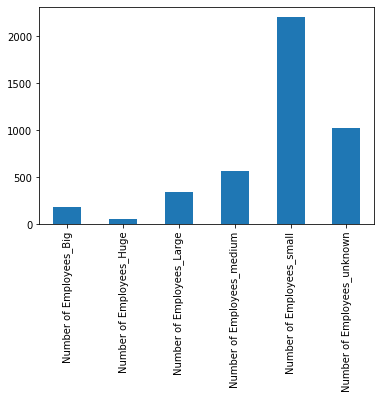

In [58]:
# customers who do make purchase in campaign and their size of employees
one[['Number of Employees_Big','Number of Employees_Huge','Number of Employees_Large','Number of Employees_medium','Number of Employees_small','Number of Employees_unknown']].sum(axis=0).plot.bar()

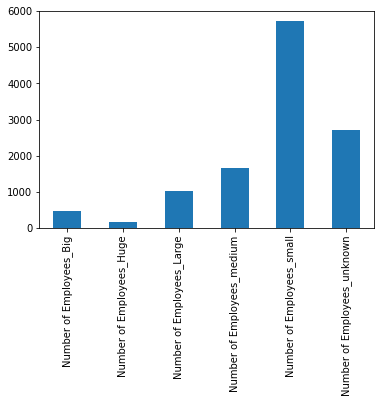

In [59]:
# customers who do not make purchase in campaign and their size of employees
zero[['Number of Employees_Big','Number of Employees_Huge','Number of Employees_Large','Number of Employees_medium','Number of Employees_small','Number of Employees_unknown']].sum(axis=0).plot.bar()

In [60]:
one[one['Number of Employees_small']==1].describe()

,Customer Number,Campaign Period Sales,Historical Sales Volume,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method_AUTO RENEW,Repurchase Method_NOTICE,Repurchase Method_PAYMENT PLAN,Last Transaction Channel_AUTO RENEW,Last Transaction Channel_BILLING,Last Transaction Channel_BRANCH (PHONE),Last Transaction Channel_BRANCH (POS),Last Transaction Channel_IT,Last Transaction Channel_MAIL,Last Transaction Channel_PHONE,Last Transaction Channel_UNKNOWN,Last Transaction Channel_WEB,Desk_N,Desk_Y,Executive Chair_N,Executive Chair_Y,Standard Chair_N,Standard Chair_Y,Monitor_N,Monitor_Y,Printer_N,Printer_Y,Computer_N,Computer_Y,Insurance_N,Insurance_Y,Toner_N,Toner_Y,Office Supplies_N,Office Supplies_Y,Number of Employees_Big,Number of Employees_Huge,Number of Employees_Large,Number of Employees_medium,Number of Employees_small,Number of Employees_unknown,Language_English,Language_Non English,Language_Unknown,year_of_first_purchase,Years_since_customer
count,2.202000e+03,2202.000000,2.202000e+03,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.0,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.0,2202.0,2202.0,2202.0,2202.0,2202.0,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000
mean,1.654137e+07,262.894620,3.461938e+05,16.654405,0.083106,0.196639,0.075840,0.240236,0.759764,0.0,0.190282,0.001362,0.027702,0.034514,0.001817,0.530881,0.049955,0.021344,0.142144,0.955041,0.044959,0.931426,0.068574,0.986376,0.013624,0.989555,0.010445,0.975477,0.024523,0.994096,0.005904,0.911444,0.088556,0.930064,0.069936,0.051771,0.948229,0.0,0.0,0.0,0.0,1.0,0.0,0.900999,0.026794,0.072207,1986.500908,33.499092
std,9.644142e+06,128.413186,3.181966e+05,5.881844,0.276105,0.397548,0.264802,0.427324,0.427324,0.0,0.392612,0.036894,0.164155,0.182587,0.042592,0.499159,0.217901,0.144562,0.349277,0.207261,0.207261,0.252786,0.252786,0.115950,0.115950,0.101689,0.101689,0.154702,0.154702,0.076626,0.076626,0.284166,0.284166,0.255098,0.255098,0.221615,0.221615,0.0,0.0,0.0,0.0,0.0,0.0,0.298731,0.161517,0.258889,13.424237,13.424237
min,8.673400e+04,6.571429,1.319314e+03,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,1926.000000,2.000000
25%,8.245170e+06,170.936667,1.314912e+05,15.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,0.000000,0.000000,1976.000000,26.000000
50%,1.649422e+07,234.900000,2.580403e+05,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,0.000000,0.000000,1990.000000,30.000000
75%,2.461618e+07,323.352381,4.595738e+05,20.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,1.0

In [61]:
zero[zero['Number of Employees_small']==1].describe()

,Customer Number,Campaign Period Sales,Historical Sales Volume,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method_AUTO RENEW,Repurchase Method_NOTICE,Repurchase Method_PAYMENT PLAN,Last Transaction Channel_AUTO RENEW,Last Transaction Channel_BILLING,Last Transaction Channel_BRANCH (PHONE),Last Transaction Channel_BRANCH (POS),Last Transaction Channel_IT,Last Transaction Channel_MAIL,Last Transaction Channel_PHONE,Last Transaction Channel_UNKNOWN,Last Transaction Channel_WEB,Desk_N,Desk_Y,Executive Chair_N,Executive Chair_Y,Standard Chair_N,Standard Chair_Y,Monitor_N,Monitor_Y,Printer_N,Printer_Y,Computer_N,Computer_Y,Insurance_N,Insurance_Y,Toner_N,Toner_Y,Office Supplies_N,Office Supplies_Y,Number of Employees_Big,Number of Employees_Huge,Number of Employees_Large,Number of Employees_medium,Number of Employees_small,Number of Employees_unknown,Language_English,Language_Non English,Language_Unknown,year_of_first_purchase,Years_since_customer
count,5.724000e+03,5724.0,5.724000e+03,5724.000000,5724.000000,5724.000000,5724.000000,5724.000000,5724.000000,5724.0,5724.000000,5724.000000,5724.000000,5724.000000,5724.000000,5724.000000,5724.000000,5724.000000,5724.000000,5724.000000,5724.000000,5724.000000,5724.000000,5724.000000,5724.000000,5724.000000,5724.000000,5724.000000,5724.000000,5724.000000,5724.000000,5724.000000,5724.000000,5724.000000,5724.000000,5724.000000,5724.000000,5724.0,5724.0,5724.0,5724.0,5724.0,5724.0,5724.000000,5724.000000,5724.000000,5724.000000,5724.000000
mean,1.693968e+07,0.0,3.877845e+05,16.564640,0.084032,0.201258,0.077044,0.251922,0.748078,0.0,0.191824,0.000524,0.022013,0.035814,0.000874,0.499651,0.058176,0.024808,0.166317,0.951957,0.048043,0.944619,0.055381,0.996681,0.003319,0.997729,0.002271,0.986723,0.013277,0.999126,0.000874,0.903913,0.096087,0.944969,0.055031,0.059574,0.940426,0.0,0.0,0.0,0.0,1.0,0.0,0.904088,0.031621,0.064291,1994.118099,25.881901
std,9.620481e+06,0.0,3.180492e+05,5.978573,0.277460,0.400975,0.266685,0.434154,0.434154,0.0,0.393770,0.022889,0.146737,0.185843,0.029545,0.500044,0.234097,0.155553,0.372398,0.213876,0.213876,0.228742,0.228742,0.057523,0.057523,0.047606,0.047606,0.114470,0.114470,0.029545,0.029545,0.294736,0.294736,0.228062,0.228062,0.236716,0.236716,0.0,0.0,0.0,0.0,0.0,0.0,0.294496,0.175005,0.245292,9.004476,9.004476
min,1.163900e+05,0.0,1.881905e+03,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,1950.000000,2.000000
25%,8.464126e+06,0.0,1.526719e+05,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,0.000000,0.000000,1989.000000,23.000000
50%,1.683203e+07,0.0,3.067387e+05,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,0.000000,0.000000,1994.000000,26.000000
75%,2.506982e+07,0.0,5.310378e+05,20.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,0.000000,0.000000,1997.000000,31.

In [62]:
# 28% customers who purchase during campaing period are small companies
2202/(2202+5724)

0.2778198334595004

In [63]:
one[one['Number of Employees_unknown']==1].describe()

,Customer Number,Campaign Period Sales,Historical Sales Volume,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method_AUTO RENEW,Repurchase Method_NOTICE,Repurchase Method_PAYMENT PLAN,Last Transaction Channel_AUTO RENEW,Last Transaction Channel_BILLING,Last Transaction Channel_BRANCH (PHONE),Last Transaction Channel_BRANCH (POS),Last Transaction Channel_IT,Last Transaction Channel_MAIL,Last Transaction Channel_PHONE,Last Transaction Channel_UNKNOWN,Last Transaction Channel_WEB,Desk_N,Desk_Y,Executive Chair_N,Executive Chair_Y,Standard Chair_N,Standard Chair_Y,Monitor_N,Monitor_Y,Printer_N,Printer_Y,Computer_N,Computer_Y,Insurance_N,Insurance_Y,Toner_N,Toner_Y,Office Supplies_N,Office Supplies_Y,Number of Employees_Big,Number of Employees_Huge,Number of Employees_Large,Number of Employees_medium,Number of Employees_small,Number of Employees_unknown,Language_English,Language_Non English,Language_Unknown,year_of_first_purchase,Years_since_customer
count,1.024000e+03,1024.000000,1.024000e+03,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.00000,1024.00000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.0,1024.0,1024.0,1024.0,1024.0,1024.0,1024.000000,1024.0,1024.000000,1024.000000,1024.000000
mean,3.189308e+07,2579.731217,9.497043e+05,15.300781,0.193359,0.278320,0.179688,0.450195,0.548828,0.000977,0.285156,0.001953,0.027344,0.033203,0.002930,0.324219,0.079102,0.033203,0.212891,0.865234,0.134766,0.833008,0.166992,0.854492,0.145508,0.834961,0.165039,0.84375,0.15625,0.855469,0.144531,0.743164,0.256836,0.818359,0.181641,0.826172,0.173828,0.0,0.0,0.0,0.0,0.0,1.0,0.020508,0.0,0.979492,1988.291992,31.708008
std,3.040898e+07,1218.831897,1.285776e+06,14.783460,0.395125,0.448391,0.384115,0.497756,0.497853,0.031250,0.451709,0.044173,0.163163,0.179254,0.054074,0.468311,0.270029,0.179254,0.409551,0.341640,0.341640,0.373151,0.373151,0.352784,0.352784,0.371397,0.371397,0.36327,0.36327,0.351799,0.351799,0.437102,0.437102,0.385736,0.385736,0.379147,0.379147,0.0,0.0,0.0,0.0,0.0,0.0,0.141799,0.0,0.141799,13.814145,13.814145
min,1.279140e+05,21.600000,2.548800e+03,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.000000,1946.000000,2.000000
25%,1.148904e+07,1700.500000,2.162114e+05,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.00000,0.00000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,1.000000,1978.000000,26.000000
50%,2.406503e+07,2322.466667,5.100464e+05,12.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.00000,0.00000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,1.000000,1993.000000,27.000000
75%,5.246597e+07,3113.600000,1.177989e+06,23.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.00000,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.

In [64]:
zero[zero['Number of Employees_unknown']==1].describe()

,Customer Number,Campaign Period Sales,Historical Sales Volume,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method_AUTO RENEW,Repurchase Method_NOTICE,Repurchase Method_PAYMENT PLAN,Last Transaction Channel_AUTO RENEW,Last Transaction Channel_BILLING,Last Transaction Channel_BRANCH (PHONE),Last Transaction Channel_BRANCH (POS),Last Transaction Channel_IT,Last Transaction Channel_MAIL,Last Transaction Channel_PHONE,Last Transaction Channel_UNKNOWN,Last Transaction Channel_WEB,Desk_N,Desk_Y,Executive Chair_N,Executive Chair_Y,Standard Chair_N,Standard Chair_Y,Monitor_N,Monitor_Y,Printer_N,Printer_Y,Computer_N,Computer_Y,Insurance_N,Insurance_Y,Toner_N,Toner_Y,Office Supplies_N,Office Supplies_Y,Number of Employees_Big,Number of Employees_Huge,Number of Employees_Large,Number of Employees_medium,Number of Employees_small,Number of Employees_unknown,Language_English,Language_Non English,Language_Unknown,year_of_first_purchase,Years_since_customer
count,2.716000e+03,2716.0,2.716000e+03,2716.000000,2716.000000,2716.000000,2716.000000,2716.000000,2716.000000,2716.0,2716.000000,2716.000000,2716.000000,2716.000000,2716.000000,2716.000000,2716.000000,2716.000000,2716.000000,2716.000000,2716.000000,2716.000000,2716.000000,2716.000000,2716.000000,2716.000000,2716.000000,2716.000000,2716.000000,2716.000000,2716.000000,2716.000000,2716.000000,2716.000000,2716.000000,2716.000000,2716.000000,2716.0,2716.0,2716.0,2716.0,2716.0,2716.0,2716.000000,2716.000000,2716.000000,2716.000000,2716.000000
mean,3.402046e+07,0.0,1.083924e+06,4.946981,0.162739,0.259573,0.145803,0.273196,0.726804,0.0,0.194772,0.001105,0.025405,0.042342,0.000368,0.436672,0.082106,0.037555,0.179676,0.953240,0.046760,0.953976,0.046024,0.991163,0.008837,0.992636,0.007364,0.983800,0.016200,0.994477,0.005523,0.872239,0.127761,0.941826,0.058174,0.962077,0.037923,0.0,0.0,0.0,0.0,0.0,1.0,0.020619,0.001105,0.978277,1995.249264,24.750736
std,3.286673e+07,0.0,1.517704e+06,5.005719,0.369196,0.438481,0.352973,0.445683,0.445683,0.0,0.396098,0.033223,0.157381,0.201405,0.019188,0.496065,0.274577,0.190153,0.383988,0.211163,0.211163,0.209575,0.209575,0.093604,0.093604,0.085512,0.085512,0.126268,0.126268,0.074124,0.074124,0.333885,0.333885,0.234115,0.234115,0.191046,0.191046,0.0,0.0,0.0,0.0,0.0,0.0,0.142130,0.033223,0.145805,9.275093,9.275093
min,2.924240e+05,0.0,6.133333e+03,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,1954.000000,2.000000
25%,1.233662e+07,0.0,2.479504e+05,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,1.000000,1989.000000,22.000000
50%,2.441287e+07,0.0,6.084277e+05,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,1.000000,1995.000000,25.000000
75%,5.269650e+07,0.0,1.396101e+06,7.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,1.000000,1998.000000,31.0000

In [65]:
# 28% customers who purchase during campaing period have unknown number of employees
1024/(1024+2716)

0.2737967914438503

### Summary of EDA

#### 1) 'Mail' is the most popular transaction channel used by customers 

#### 2) 'Notice' is the most popular repurchase method. Payment plan is hardly used.

#### 3)  Customers who made NO purchase in campaign were loyal to store since 14 years on average

#### 4) Customers who made a purchase in campaign were loyal to store since 16 years on average

#### 5) 85% people who had purchased computer made purchase during campaign period 

#### 6) 82% people who had purchased Monitor made purchase during campaign period 

#### 7) 80% people who had purchased standard chair made purchase during campaign period 

#### 8) 63% people who had purchased Printer made purchase during campaign period 

#### 9) 40% people who had purchased Toner made purchase during campaign period 

#### 10) 40% people who had purchased Executive Chair made purchase during campaign period 

#### 11) 32% people who had purchased Insurance made purchase during campaign period

#### 12) 30% people who had purchased Office Supplies made purchase during campaign period. Although Office supplies is the purchased the most by customers but if looked closely, 8500 customers who bought it made no purchase in campaign and 3300 customers who made a purchase during campaign bought it.

#### 13) 28% customers who purchase during campaing period are small companies

#### 14) 28% customers who purchase during campaing period have unknown number of employees